In [1]:
from bike_class import BikeShareDataLoader
import requests
import zipfile
import io
import pandas as pd
import chardet

In [2]:


'''
URL to the metadata from the City of Toronto's Open Data portal
 This URL points to the JSON metadata for the Bike Share Toronto ridership data
 '''
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=bike-share-toronto-ridership-data"
metadata = BikeShareDataLoader(url)



In [ ]:
# Load all the dataframes for each year
#df_2017 = metadata.create_df(2017)
# df_2018 = metadata.create_df(2018)
# df_2019 = metadata.create_df(2019)
# df_2020 = metadata.create_df(2020)
# df_2021 = metadata.create_df(2021)
# df_2022 = metadata.create_df(2022)
# df_2023 = metadata.create_df(2023)
df_2024 = metadata.create_df(2024)

In [ ]:
# Make sure the dataframes are loaded correctly and are consistent across years
# df_2021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,10644218,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member
1,10644220,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member
2,10644221,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member
3,10644222,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member
4,10644223,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member


In [54]:


df_2024.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model
0,26682740,528,7041,01/01/2024 00:00,Edward St / Yonge St,7130.0,01/01/2024 00:08,Davenport Rd / Bedford Rd,7855,Casual Member,NaN
1,26682742,1924,7245,01/01/2024 00:02,Tecumseth St / Queen St W - SMART,7259.0,01/01/2024 00:34,Lower Spadina Ave / Lake Shore Blvd,2453,Casual Member,NaN
2,26682743,2741,7052,01/01/2024 00:03,Wellington St W / Bay St,7366.0,01/01/2024 00:49,Fort York Blvd / Bathurst St SMART,7332,Casual Member,NaN
3,26682744,353,7041,01/01/2024 00:03,Edward St / Yonge St,7418.0,01/01/2024 00:09,College Park - Yonge St Entrance,782,Casual Member,NaN
4,26682746,2118,7721,01/01/2024 00:04,NaN,7721.0,01/01/2024 00:40,NaN,1008,Casual Member,NaN


In [65]:
def clean_column_names(df):
    """
    Standardize column names: lowercase, strip spaces, and replace spaces with underscores.
    """
    df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
    return df

# Example usage:
df = clean_column_names(df_2024)

In [66]:
df = df_2024
standardize_columns(df)
df.columns

Index(['trip_id', 'trip__duration', 'start_station_id', 'start_time',
       'start_station_name', 'end_station_id', 'end_time', 'end_station_name',
       'bike_id', 'user_type', 'model'],
      dtype='object')

In [67]:
# Check for duplicate records based on 'trip_id'
duplicate_count = df.duplicated(subset=['trip_id']).sum()
print(f"Number of duplicate records based on trip_id: {duplicate_count}")

# Optionally, display the duplicate rows
if duplicate_count > 0:
    duplicates = df[df.duplicated(subset=['trip_id'], keep=False)]
    print(duplicates.head())

Number of duplicate records based on trip_id: 0


In [68]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342388 entries, 0 to 5342387
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   trip_id             5342388 non-null  int64  
 1   trip__duration      5342388 non-null  int64  
 2   start_station_id    5342388 non-null  int64  
 3   start_time          5342388 non-null  object 
 4   start_station_name  5229427 non-null  object 
 5   end_station_id      5342293 non-null  float64
 6   end_time            5342388 non-null  object 
 7   end_station_name    5227546 non-null  object 
 8   bike_id             5342388 non-null  int64  
 9   user_type           5342388 non-null  object 
 10  model               5127226 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 448.4+ MB


In [69]:
df.isnull().sum()

trip_id                    0
trip__duration             0
start_station_id           0
start_time                 0
start_station_name    112961
end_station_id            95
end_time                   0
end_station_name      114842
bike_id                    0
user_type                  0
model                 215162
dtype: int64

In [70]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)

model                 0.040274
end_station_name      0.021496
start_station_name    0.021144
end_station_id        0.000018
start_station_id      0.000000
trip_id               0.000000
trip__duration        0.000000
end_time              0.000000
start_time            0.000000
bike_id               0.000000
user_type             0.000000
dtype: float64

In [71]:
bikeshare_df = df.dropna()

In [74]:
# Display count of unique values for each column in bikeshare_df
for col in bikeshare_df.columns:
    print(f"Column: {col}")
    print(f"Unique count: {bikeshare_df[col].nunique()}")
    print("-" * 40)

Column: trip_id
Unique count: 4963572
----------------------------------------
Column: trip__duration
Unique count: 18543
----------------------------------------
Column: start_station_id
Unique count: 808
----------------------------------------
Column: start_time
Unique count: 321809
----------------------------------------
Column: start_station_name
Unique count: 905
----------------------------------------
Column: end_station_id
Unique count: 809
----------------------------------------
Column: end_time
Unique count: 322384
----------------------------------------
Column: end_station_name
Unique count: 906
----------------------------------------
Column: bike_id
Unique count: 8012
----------------------------------------
Column: user_type
Unique count: 2
----------------------------------------
Column: model
Unique count: 3
----------------------------------------


In [75]:
# There should only be two user types: Member and Casual
# Display unique values in the 'user_type' column
print("Unique user types:", bikeshare_df['user_type'].unique())

bikeshare_df['user_type'] = bikeshare_df['user_type'].replace({'Annual Member': 'Member', 'Casual Member': 'Casual'})
print("User types after standardization:", bikeshare_df['user_type'].unique())

Unique user types: ['Casual Member' 'Annual Member']
User types after standardization: ['Casual' 'Member']


/var/folders/6w/ztwdckfs2_1b1bkgxgn768jh0000gn/T/ipykernel_17956/2811367001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeshare_df['user_type'] = bikeshare_df['user_type'].replace({'Annual Member': 'Member', 'Casual Member': 'Casual'})


In [76]:
# Initial idea was to map station names and ids to fill in missing values, this is too cumbersome. Let's check how many rows we would lose by dropping nulls.
total_rows = len(bikeshare_df)
nulls_subset = bikeshare_df.dropna(subset=['start_station_name', 'end_station_name', 'duration_seconds',
                                          'start_station_id', 'end_station_id', 'user_type'])
remaining_rows = len(nulls_subset)

print(f"Total rows: {total_rows}")
print(f"Rows after dropping nulls: {remaining_rows}")
print(f"Percentage kept: {remaining_rows/total_rows*100:.2f}%")


bikeshare_df = nulls_subset

KeyError: ['duration_seconds']

In [20]:
# We still keep approximately 91% of the data, let's drop null stations.
bikeshare_df = nulls_subset

In [21]:
bikeshare_df.isnull().sum()

trip_id               0
start_time            0
end_time              0
duration_seconds      0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
dtype: int64

In [22]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25021357 entries, 0 to 27697099
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   trip_id             int64  
 1   start_time          object 
 2   end_time            object 
 3   duration_seconds    float64
 4   start_station_id    object 
 5   start_station_name  object 
 6   end_station_id      object 
 7   end_station_name    object 
 8   user_type           object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ GB


## Feature Engineering

In [23]:
# Make copy of the cleaned dataframe for potential further processing without time-based features
og_bikeshare_df = bikeshare_df.copy()

In [24]:

bikeshare_df['starttime'] = pd.to_datetime(bikeshare_df['start_time'], errors='coerce')
bikeshare_df['endtime'] = pd.to_datetime(bikeshare_df['end_time'], errors='coerce')
bikeshare_df['start_station_id'] = bikeshare_df['start_station_id'].astype(int)
bikeshare_df['end_station_id'] = bikeshare_df['end_station_id'].astype(int)
bikeshare_df['start_station_name'] = bikeshare_df['start_station_name'].astype(str)
bikeshare_df['end_station_name'] = bikeshare_df['end_station_name'].astype(str)
bikeshare_df['user_type'] = bikeshare_df['user_type'].astype(str)

In [25]:
bikeshare_df.isnull().sum()

trip_id                    0
start_time                 0
end_time                   0
duration_seconds           0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
starttime             302049
endtime               301961
dtype: int64

In [26]:
bikeshare_df.dropna(inplace=True)


In [27]:
bikeshare_df.isnull().sum()


trip_id               0
start_time            0
end_time              0
duration_seconds      0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
starttime             0
endtime               0
dtype: int64

In [28]:
# Extract features for ML
bikeshare_df['start_hour'] = bikeshare_df['starttime'].dt.hour
bikeshare_df['start_dayofweek'] = bikeshare_df['starttime'].dt.dayofweek  # Monday=0, Sunday=6
bikeshare_df['start_month'] = bikeshare_df['starttime'].dt.month
bikeshare_df['is_weekend'] = bikeshare_df['start_dayofweek'].isin([5, 6]).astype(int)

In [29]:
# Dictionary: start station id to name
start_station_id_to_name = dict(zip(bikeshare_df['start_station_id'], bikeshare_df['start_station_name']))

# Dictionary: end station id to name
end_station_id_to_name = dict(zip(bikeshare_df['end_station_id'], bikeshare_df['end_station_name']))

# Dictionary: day of week mapping (0=Monday, 6=Sunday)
day_of_week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [30]:
# Combine start_id_to_name and end_id_to_name into one dictionary with unique values
station_to_name = {**start_station_id_to_name, **end_station_id_to_name}


In [31]:

# Checking the final structure of the dictionary
print(f"Total stations: {len(station_to_name)}")
print("Sample items:", list(station_to_name.items())[:10])
print("Key types:", set(type(k) for k in station_to_name.keys()))

Total stations: 867
Sample items: [(7051, 'Mutual St / Shuter St'), (7143, 'Kendal Ave / Bernard Ave'), (7113, 'Parliament St / Aberdeen Ave'), (7077, 'College Park South'), (7079, 'McGill St / Church St'), (7021, 'Bay St / Albert St'), (7161, 'Beverley St / College St'), (7195, 'Ulster St / Bathurst St'), (7017, 'Widmer St / Adelaide St W - SMART'), (7009, 'King St E / Jarvis St')]
Key types: {<class 'int'>}


In [32]:
bikeshare_df.head()

,trip_id,start_time,end_time,duration_seconds,start_station_id,start_station_name,end_station_id,end_station_name,user_type,starttime,endtime,start_hour,start_dayofweek,start_month,is_weekend
0,712382,1/1/2017 0:00,1/1/2017 0:03,223.0,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,2017-01-01 00:00:00,2017-01-01 00:03:00,0,6,1,1
1,712383,1/1/2017 0:00,1/1/2017 0:05,279.0,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,2017-01-01 00:00:00,2017-01-01 00:05:00,0,6,1,1
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394.0,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,2017-01-01 00:05:00,2017-01-01 00:29:00,0,6,1,1
3,712385,1/1/2017 0:07,1/1/2017 0:21,826.0,7077,College Park South,7010,King St W / Spadina Ave,Member,2017-01-01 00:07:00,2017-01-01 00:21:00,0,6,1,1
4,712386,1/1/2017 0:08,1/1/2017 0:12,279.0,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,2017-01-01 00:08:00,2017-01-01 00:12:00,0,6,1,1


In [33]:
# Dictionary names and id do not match to the dataframe records

# Check the first row's station mapping
first_row = bikeshare_df.iloc[0]
print(f"First row start station ID: {first_row['start_station_id']}")
print(f"First row start station name: {first_row['start_station_name']}")
print(f"Dictionary maps ID {first_row['start_station_id']} to: {station_to_name[first_row['start_station_id']]}")

# Check if there are inconsistent names for the same station ID
start_station_check = bikeshare_df.groupby('start_station_id')['start_station_name'].nunique()
inconsistent_stations = start_station_check[start_station_check > 1]
if len(inconsistent_stations) > 0:
    print(f"\nFound {len(inconsistent_stations)} station IDs with multiple names")
    print(inconsistent_stations.head())
    
    # Example of inconsistent names for the first problematic ID
    if len(inconsistent_stations) > 0:
        example_id = inconsistent_stations.index[0]
        example_names = bikeshare_df[bikeshare_df['start_station_id'] == example_id]['start_station_name'].unique()
        print(f"\nExample - ID {example_id} has these names: {example_names}")

First row start station ID: 7051
First row start station name: Wellesley St E / Yonge St Green P
Dictionary maps ID 7051 to: Mutual St / Shuter St

Found 237 station IDs with multiple names
start_station_id
7000    2
7001    2
7002    2
7005    2
7007    2
Name: start_station_name, dtype: int64

Example - ID 7000 has these names: ['Fort York  Blvd / Capreol Crt' 'Fort York  Blvd / Capreol Ct']


In [34]:
# Assumption: Station names are unique for each id, but there might be inconsistencies since we are now taking the most common name per id.

# Fix station_id to name mapping by choosing the most common name for each station_id

most_common_start_names = bikeshare_df.groupby('start_station_id')['start_station_name'] \
    .agg(lambda x: x.value_counts().idxmax())
most_common_end_names = bikeshare_df.groupby('end_station_id')['end_station_name'] \
    .agg(lambda x: x.value_counts().idxmax())

# Create new dictionaries with the most common name for each station id
start_station_id_to_name_fixed = most_common_start_names.to_dict()
end_station_id_to_name_fixed = most_common_end_names.to_dict()

# Combine into one dictionary (start and end)
station_to_name_final = {**start_station_id_to_name_fixed, **end_station_id_to_name_fixed}

## Data Visualization

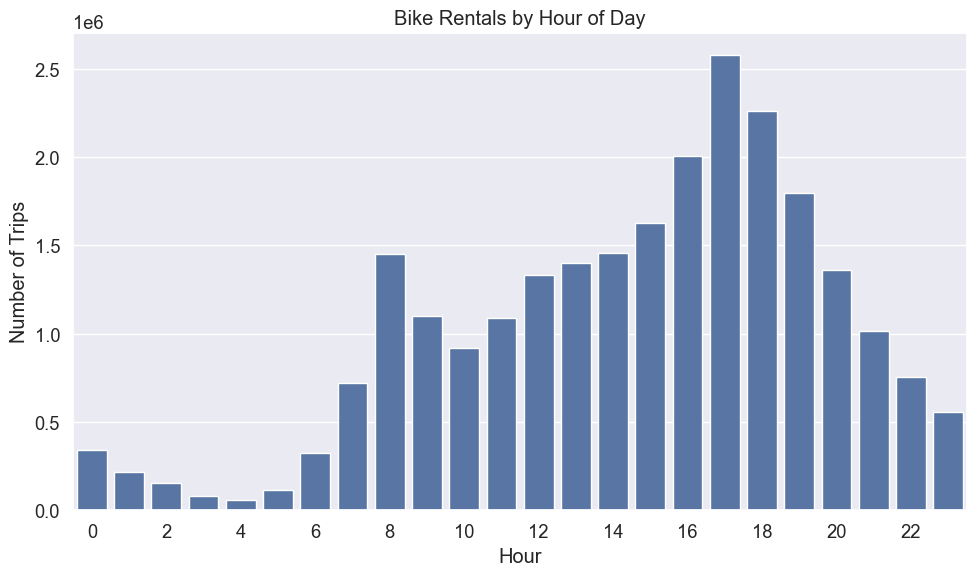

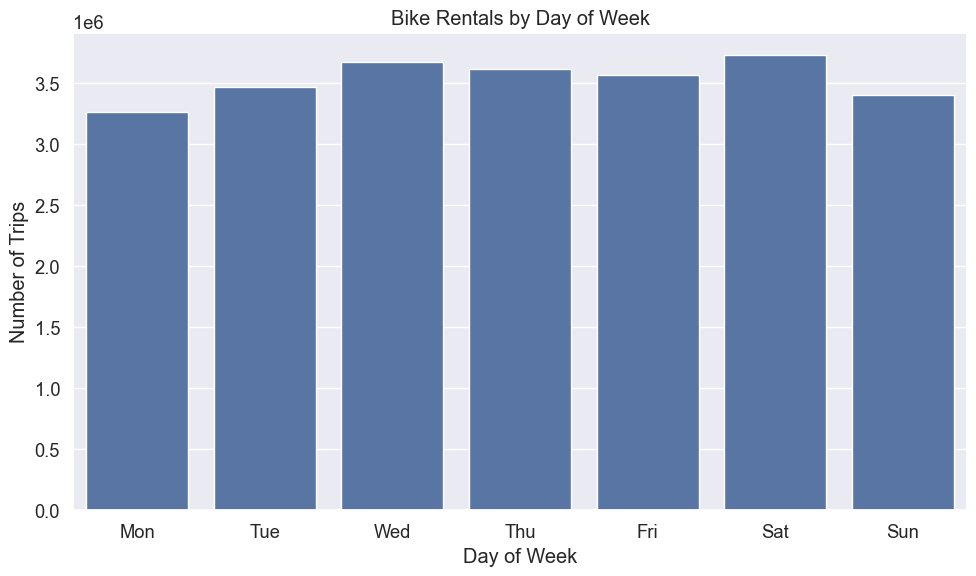

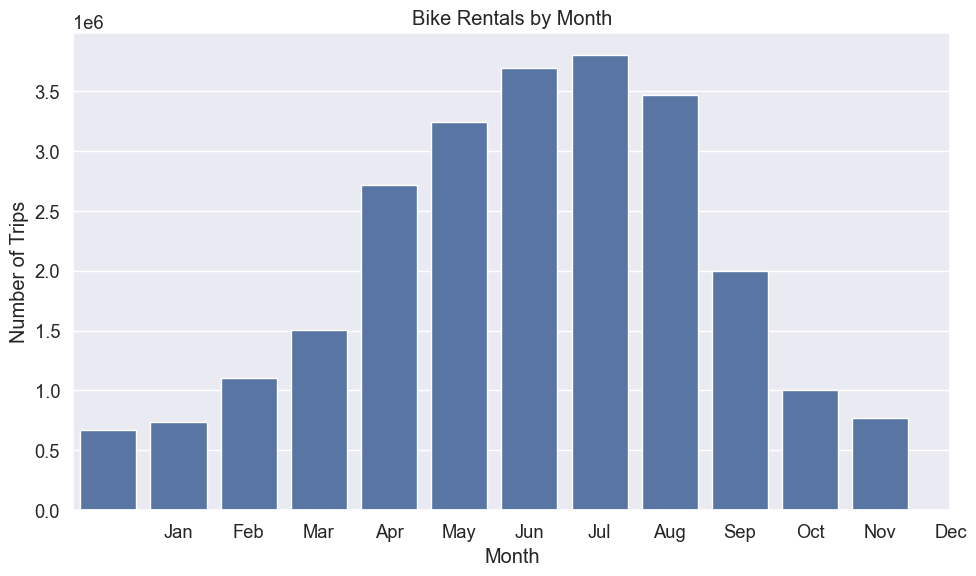

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 1. Hourly usage patterns
hourly_counts = bikeshare_df.groupby('start_hour').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Bike Rentals by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# 2. Daily patterns
daily_counts = bikeshare_df.groupby('start_dayofweek').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_counts.index, y=daily_counts.values)
plt.title('Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

# 3. Monthly trends
monthly_counts = bikeshare_df.groupby('start_month').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

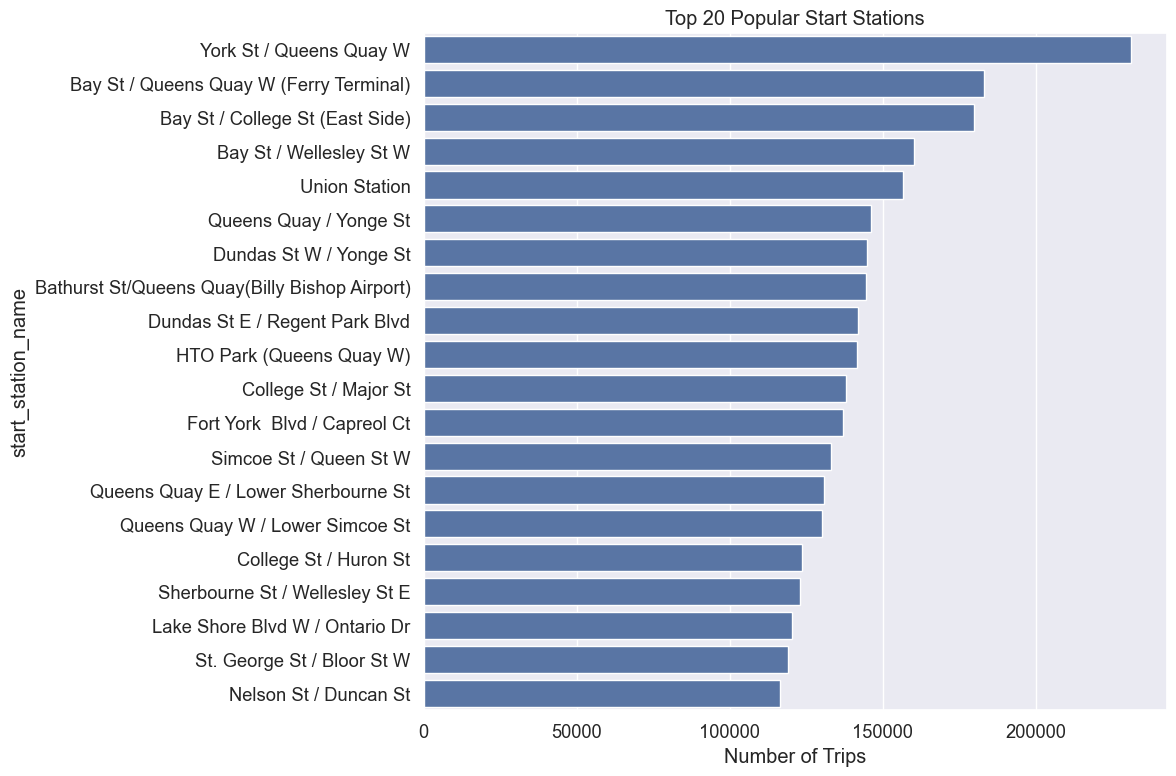

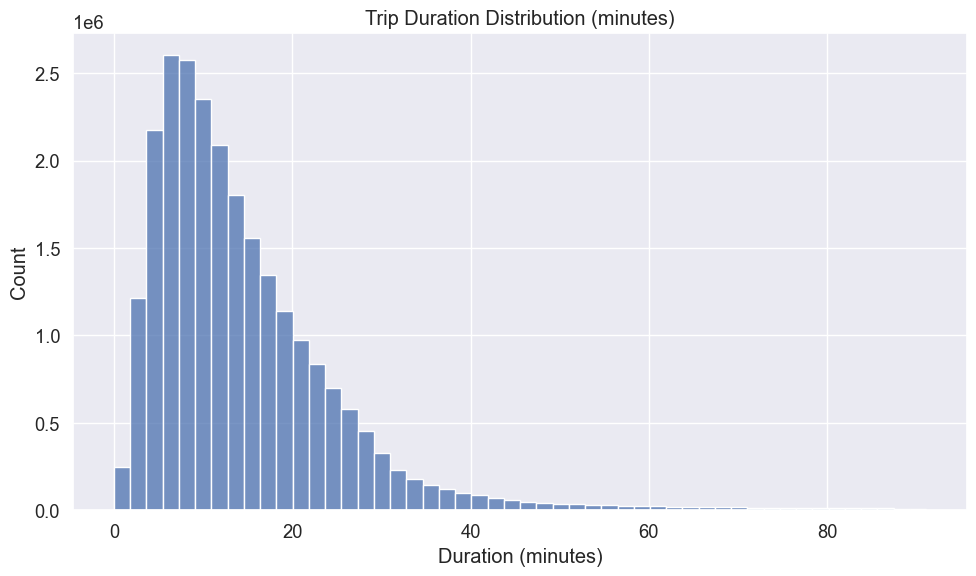

In [36]:
# 4. Top 20 most popular start stations
top_start = bikeshare_df['start_station_name'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_start.values, y=top_start.index)
plt.title('Top 20 Popular Start Stations')
plt.xlabel('Number of Trips')
plt.tight_layout()
plt.show()

# 5. Trip duration distribution
plt.figure(figsize=(10, 6))
# Cap at 99th percentile to avoid outliers stretching the plot
duration_cap = bikeshare_df['duration_seconds'].quantile(0.99)
sns.histplot(bikeshare_df[bikeshare_df['duration_seconds'] < duration_cap]['duration_seconds'] / 60, bins=50)
plt.title('Trip Duration Distribution (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

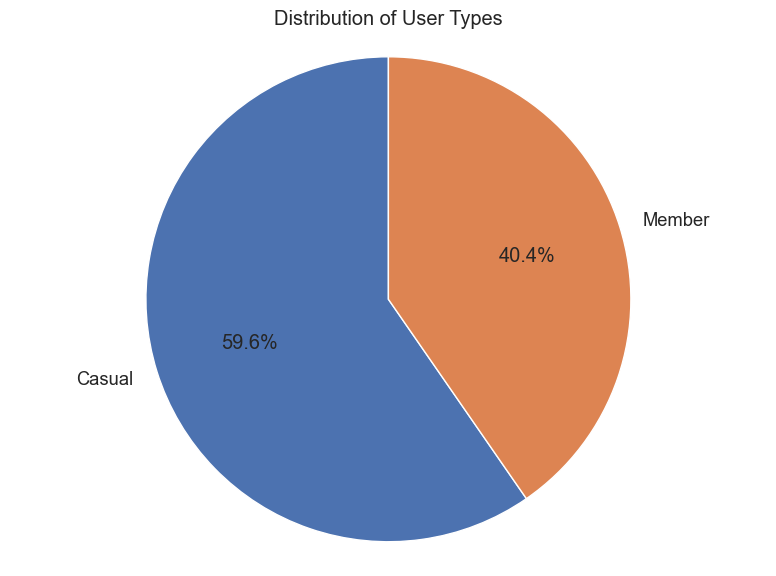

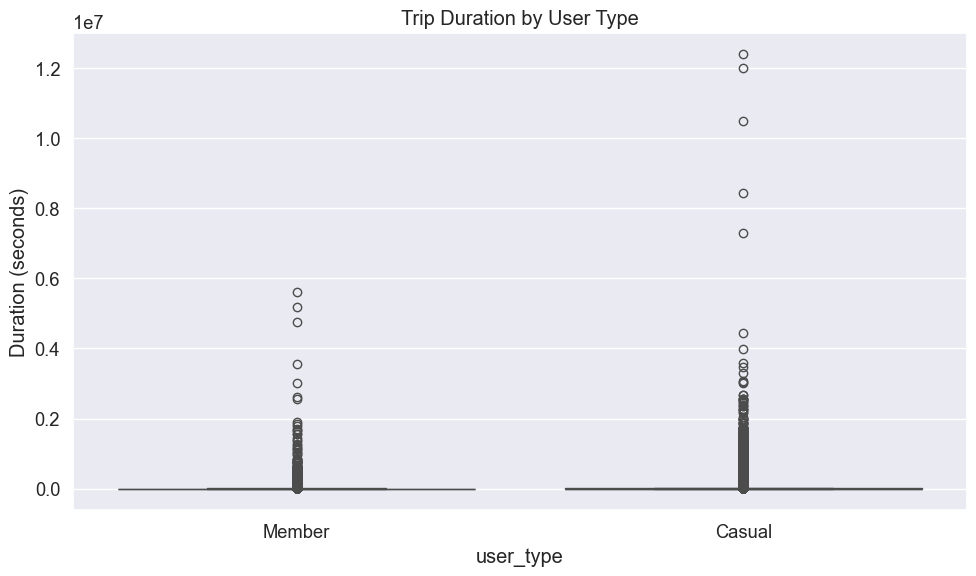

In [37]:
# 6. User type distribution
plt.figure(figsize=(8, 6))
user_counts = bikeshare_df['user_type'].value_counts()
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of User Types')
plt.tight_layout()
plt.show()

# 7. Trip duration by user type
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_seconds', data=bikeshare_df)
plt.title('Trip Duration by User Type')
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()

# Binary Classification Predicting User Type Member vs. Casual

In [38]:
# really making sure we have no null values left
bikeshare_df.isnull().sum()

trip_id               0
start_time            0
end_time              0
duration_seconds      0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
starttime             0
endtime               0
start_hour            0
start_dayofweek       0
start_month           0
is_weekend            0
dtype: int64

In [39]:

# import packages for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [40]:
model_df = bikeshare_df.copy()
# Sample 100,000 rows for modeling due to memory constraints
model_df = model_df.sample(n=100_000, random_state=42)

In [41]:
# Keep only top 20 stations, group others as 'Other'
top_starts = model_df['start_station_id'].value_counts().nlargest(20).index
model_df['start_station_id'] = model_df['start_station_id'].where(model_df['start_station_id'].isin(top_starts), other='Other')
top_ends = model_df['end_station_id'].value_counts().nlargest(20).index
model_df['end_station_id'] = model_df['end_station_id'].where(model_df['end_station_id'].isin(top_ends), other='Other')
model_df.drop(['trip_id','start_time', 'end_time','starttime','endtime', 'start_station_name', 'end_station_name'], axis=1, inplace=True)
model_df = pd.get_dummies(model_df, columns=['start_hour', 'start_dayofweek', 'start_month', 'start_station_id', 'end_station_id'], drop_first=True, sparse=True)
le_user = LabelEncoder()
model_df['user_type'] = le_user.fit_transform(model_df['user_type'])

In [42]:
X = model_df.drop('user_type', axis=1)
y = model_df['user_type']



In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.isnull().sum())
print(X_test.isnull().sum())


duration_seconds            0
is_weekend                  0
start_hour_1            False
start_hour_2            False
start_hour_3            False
                        ...  
end_station_id_7203     False
end_station_id_7242     False
end_station_id_7260     False
end_station_id_7261     False
end_station_id_Other    False
Length: 82, dtype: Sparse[int64, False]
duration_seconds            0
is_weekend                  0
start_hour_1            False
start_hour_2            False
start_hour_3            False
                        ...  
end_station_id_7203     False
end_station_id_7242     False
end_station_id_7260     False
end_station_id_7261     False
end_station_id_Other    False
Length: 82, dtype: Sparse[int64, False]


/var/folders/6w/ztwdckfs2_1b1bkgxgn768jh0000gn/T/ipykernel_17956/878393605.py:3: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  print(X_train.isnull().sum())
/var/folders/6w/ztwdckfs2_1b1bkgxgn768jh0000gn/T/ipykernel_17956/878393605.py:4: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  print(X_test.isnull().sum())


In [44]:
# Initialize the model
gnb = GaussianNB()
# Fit the model
gnb.fit(X_train, y_train)
# Make predictions
y_pred = gnb.predict(X_test) 

/Users/aahiljivani/Documents/GitHub/bike-share-predictive-modeling/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/aahiljivani/Documents/GitHub/bike-share-predictive-modeling/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

      Casual       0.74      0.23      0.35     11920
      Member       0.44      0.88      0.58      8080

    accuracy                           0.49     20000
   macro avg       0.59      0.55      0.47     20000
weighted avg       0.62      0.49      0.44     20000



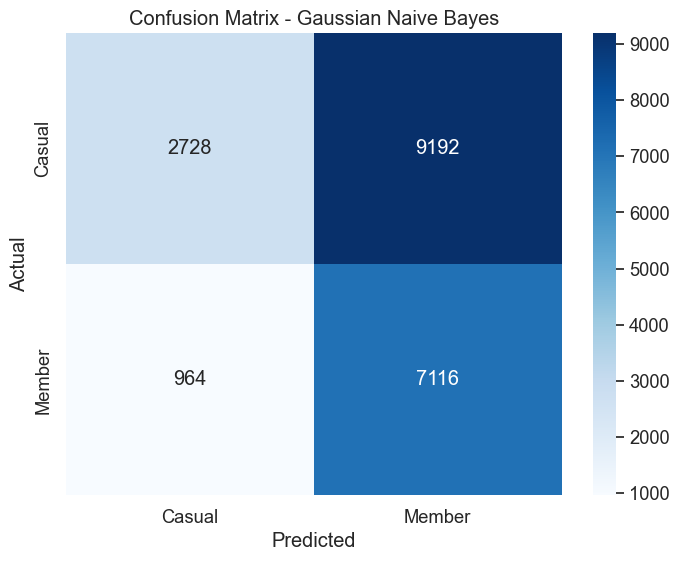

In [45]:
# Evaluate the model
print("Gaussian Naive Bayes Classifier:")
print(classification_report(y_test, y_pred, target_names=le_user.classes_))
# Confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=le_user.classes_, yticklabels=le_user.classes_)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.49


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("RF accuracy:", rf.score(X_test, y_test))

/Users/aahiljivani/Documents/GitHub/bike-share-predictive-modeling/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/aahiljivani/Documents/GitHub/bike-share-predictive-modeling/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RF accuracy: 0.56705
